**TEGAR MAULANA PUTRA**

---

**20230040336**

---

**TI23E**


In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
# Data kota dan koordinat (X, Y)
cities = {
    'A': (2, 3),
    'B': (5, 8),
    'C': (6, 3),
    'D': (8, 6),
    'E': (1, 7)
}
city_names = list(cities.keys())

In [3]:
# Fungsi menghitung jarak dua kota
def distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [4]:
# Membuat individu (solusi): urutan kunjungan kota
def create_individual():
    path = city_names[:]
    random.shuffle(path)
    return path

In [5]:
# Fungsi fitness: total jarak rute (termasuk kembali ke kota awal)
def fitness(individual):
    dist = 0
    for i in range(len(individual)):
        city_from = individual[i]
        city_to = individual[(i + 1) % len(individual)]  # kembali ke awal
        dist += distance(city_from, city_to)
    return dist

In [6]:
# Seleksi dua terbaik
def selection(population):
    return sorted(population, key=lambda x: fitness(x))[:2]

In [7]:
# Crossover: Order Crossover (OX)
def crossover(p1, p2):
    start, end = sorted(random.sample(range(len(p1)), 2))
    slice1 = p1[start:end]
    child1 = slice1 + [c for c in p2 if c not in slice1]
    slice2 = p2[start:end]
    child2 = slice2 + [c for c in p1 if c not in slice2]
    return child1, child2

In [8]:
# Mutasi: tukar dua posisi
def mutate(individual):
    i, j = random.sample(range(len(individual)), 2)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

In [9]:
# Visualisasi rute
def plot_route(route, generation):
    plt.figure(figsize=(6, 5))
    x = [cities[city][0] for city in route + [route[0]]]
    y = [cities[city][1] for city in route + [route[0]]]
    plt.plot(x, y, marker='o', linestyle='-')
    for city in route:
        plt.text(cities[city][0], cities[city][1], city, fontsize=12, ha='right')
    plt.title(f'Rute Terbaik - Generasi {generation}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

In [10]:
# Algoritma Genetika
def genetic_algorithm():
    population_size = 10
    generations = 50
    population = [create_individual() for _ in range(population_size)]

    best_individual = min(population, key=lambda ind: fitness(ind))
    best_fitness = fitness(best_individual)

    for gen in range(1, generations + 1):
        new_population = []
        for _ in range(population_size // 2):
            p1, p2 = selection(population)
            c1, c2 = crossover(p1, p2)
            new_population.extend([mutate(c1), mutate(c2)])
        population = new_population
        current_best = min(population, key=lambda ind: fitness(ind))
        if fitness(current_best) < best_fitness:
            best_individual = current_best
            best_fitness = fitness(current_best)
        print(f"Generasi {gen}: {best_individual} | Jarak: {best_fitness:.2f}")

    print("\nRute Terbaik:")
    print(" → ".join(best_individual + [best_individual[0]]))
    print(f"Total Jarak: {best_fitness:.2f}")
    plot_route(best_individual, gen)

Generasi 1: ['D', 'B', 'A', 'E', 'C'] | Jarak: 23.57
Generasi 2: ['D', 'B', 'A', 'E', 'C'] | Jarak: 23.57
Generasi 3: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 4: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 5: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 6: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 7: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 8: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 9: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 10: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 11: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 12: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 13: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 14: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 15: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 16: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 17: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 18: ['B', 'E', 'A', 'C', 'D'] | Jarak: 19.46
Generasi 19: ['B', 'E', 'A', 'C', 'D'

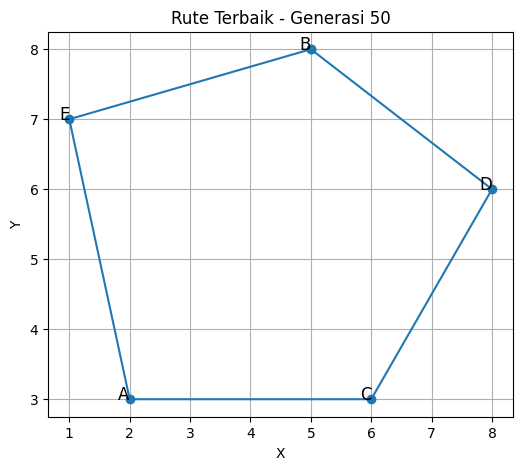

In [11]:
genetic_algorithm()